<a href="https://colab.research.google.com/github/OkktaDan/CCMACLRL_EXERCISES_COM231/blob/main/Exercises/Exercise_5/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [274]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [275]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [276]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Display one raw image directly from your drive

In [277]:
def display_image(path):
  image = Image.open(path)

  plt.imshow(image)
  plt.axis('on')
  plt.show()

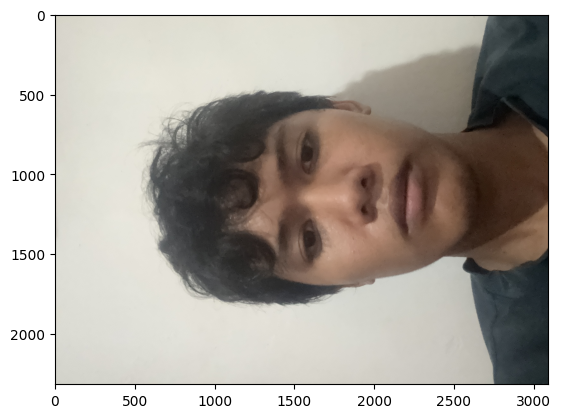

In [278]:
display_image("/content/drive/MyDrive/Porn/Test/Luis/IMG_4077.JPG")

## 2. Load the images from your drive and apply preprocessing to your raw images

In [279]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [280]:
images, labels = load_images_from_folder("/content/drive/MyDrive/Porn/Train")

In [281]:
images.shape

(570, 10000)

In [282]:
labels.shape

(570,)

In [283]:
labels

array(['Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
       'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil', 'Emil',
      

## 3. Display one pre-processed image from the training set

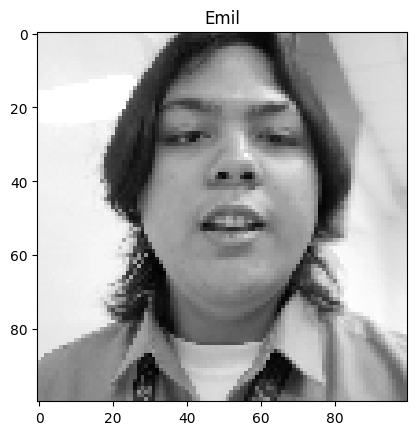

In [284]:
image = images[0].reshape(100,100)
name = labels[0]


plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')
plt.show()

## 4. Display ten pre-processed images from the training set

In [285]:
import random as rand

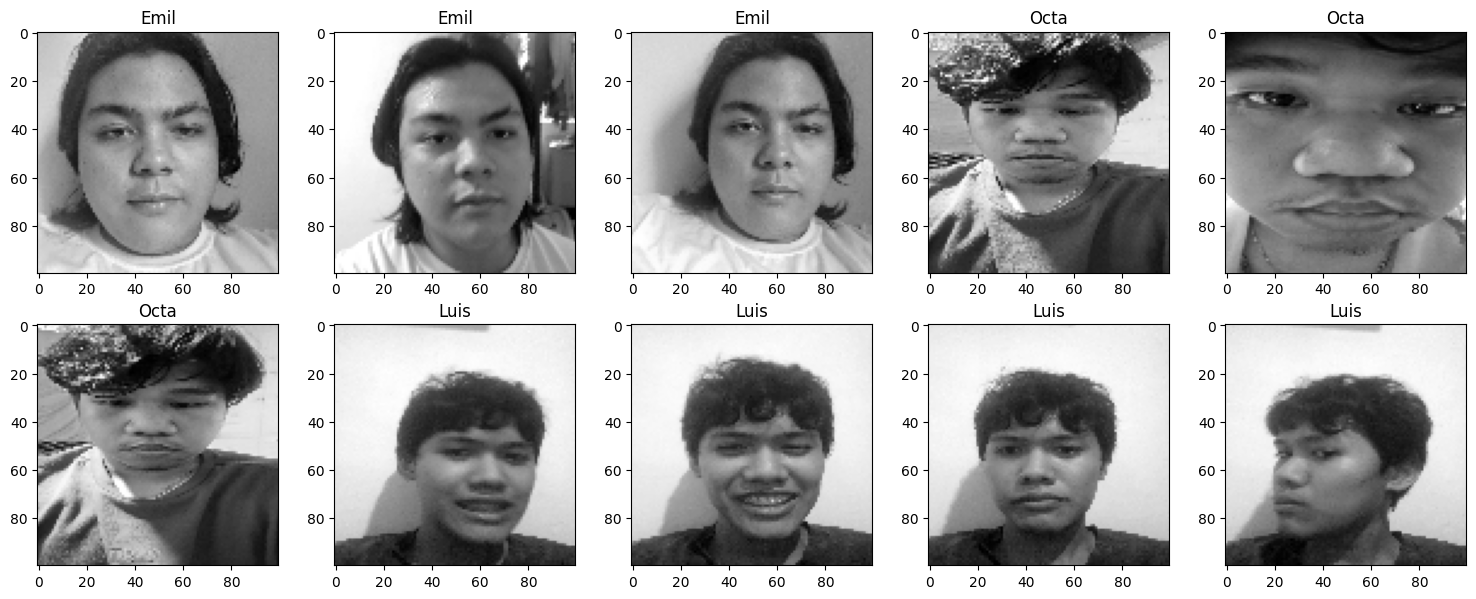

In [286]:

num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Loop to display the images
for i in range(num_faces):
    if i <= 2:
      r = rand.randint(1, 190)
      image = images[r].reshape(100,100)
      name = labels[r]

      axes[i].imshow(image, cmap='gray')
      axes[i].set_title(name)
      axes[i].axis('on')
    if i > 2 and i < 6:
       r = rand.randint(191, 380)
       image = images[r].reshape(100,100)
       name = labels[r]
       axes[i].imshow(image, cmap='gray')
       axes[i].set_title(name)
       axes[i].axis('on')
    if i >= 6:
       r = rand.randint(381, 570)
       image = images[r].reshape(100,100)
       name = labels[r]
       axes[i].imshow(image, cmap='gray')
       axes[i].set_title(name)
       axes[i].axis('on')

# Adjust layout
plt.tight_layout()
plt.show()

## 5. Split your training data

In [287]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [288]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [289]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.12%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [290]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

In [291]:
import glob

Luis Sanisit - Image Recognition Test

Prediction: ['Luis'] | Photo: 7 / 10


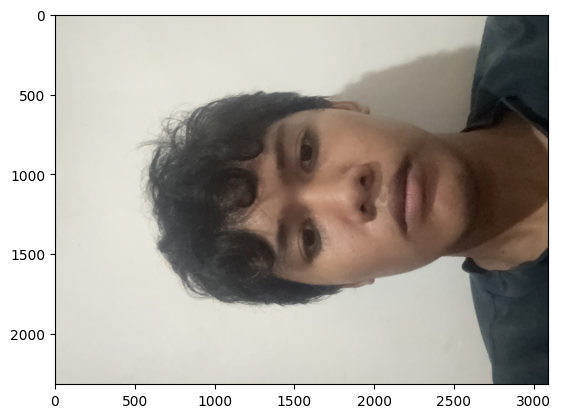

In [339]:
luis_paths = glob.glob("/content/drive/MyDrive/Porn/Test/Luis/*.JPG")
ran_img = rand.randint(0, len(luis_paths)-1)
prediction = predict_image(luis_paths[ran_img], model)

print(f"Prediction: {prediction} | Photo: {ran_img + 1} / {len(luis_paths)}")
display_image(luis_paths[ran_img])


Emil Llanes - Image Recognition Test

Prediction: ['Emil'] | Photo: 2 / 10


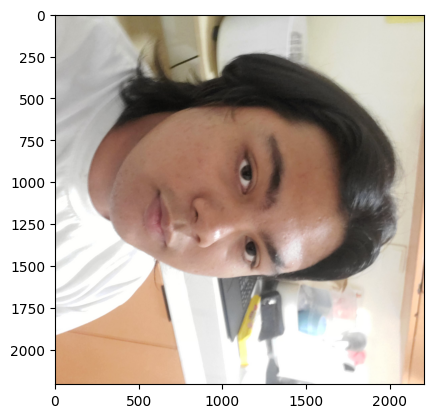

In [338]:
emil_paths = glob.glob("/content/drive/MyDrive/Porn/Test/Emil/*.jpg")
ran_img = rand.randint(0, len(emil_paths)-1)
prediction = predict_image(emil_paths[ran_img], model)

print(f"Prediction: {prediction} | Photo: {ran_img + 1} / {len(emil_paths)}")
display_image(emil_paths[ran_img])


Danielle Octaviano - Image Recognition Test

Prediction: ['Octa'] | Photo: 3 / 10


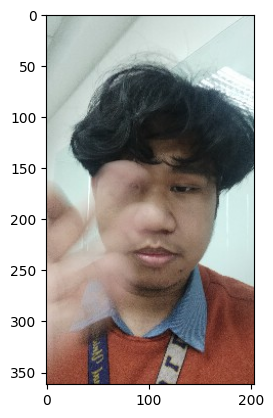

In [337]:
octa_paths = glob.glob("/content/drive/MyDrive/Porn/Test/Octa/*.jpg")
ran_img = rand.randint(0, len(octa_paths)-1)
prediction = predict_image(octa_paths[ran_img], model)

print(f"Prediction: {prediction} | Photo: {ran_img + 1} / {len(octa_paths)}")
display_image(octa_paths[ran_img])
